# Simple MNIST BPNN

(classic three-layer back-propagation neural network)

**Author:** Hitoshi Iyatomi <br>
**Date created:**  2021/5/10<br>
**Description:** A simple back-prop neural network that achieves around 95-97% test accuracy on MNIST (with 32 hidden units with ReLU).

activation = ReLU  
optimizer  = Adam   

## Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

num_train = x_train.shape[0]
num_test  = x_test.shape[0]

print(type(x_train))
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

<class 'numpy.ndarray'>
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


label = 5


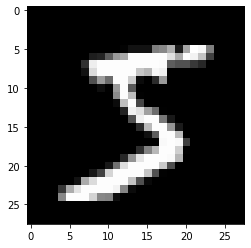

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")
print(f'label = {y_train[0]}')

In [4]:
# flatten image data for BPNN
x_train_flat = x_train.reshape(num_train,-1)
print(f'x_train_flat : {x_train_flat.shape}')
x_test_flat = x_test.reshape(num_test, -1)
print(f'x_test_flat  : {x_test_flat.shape}')

x_train_flat : (60000, 784)
x_test_flat  : (10000, 784)


In [5]:
# Scale images to the [0, 1] range
x_train_flat = x_train_flat.astype("float32") / 255
x_test_flat = x_test_flat.astype("float32") / 255

print("-----------")
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

for i in range(10):
    print(f' y_train {i} : {y_train[i]}')

# convert class vectors to binary class matrices
# (e.g.  for each data,  '5' -> [0,0,0,0,0,1,0,0,0,0])
y_trainCAT = keras.utils.to_categorical(y_train, num_classes)
y_testCAT = keras.utils.to_categorical(y_test, num_classes)
print('==to_categorial===')
print("y_trainCAT shape:", y_trainCAT.shape)
print("y_testCAT shape:", y_testCAT.shape)

for i in range(10):
    print(f' y_trainCAT {i} : {y_trainCAT[i]}')

-----------
y_train shape: (60000,)
y_test shape: (10000,)
 y_train 0 : 5
 y_train 1 : 0
 y_train 2 : 4
 y_train 3 : 1
 y_train 4 : 9
 y_train 5 : 2
 y_train 6 : 1
 y_train 7 : 3
 y_train 8 : 1
 y_train 9 : 4
==to_categorial===
y_trainCAT shape: (60000, 10)
y_testCAT shape: (10000, 10)
 y_trainCAT 0 : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 y_trainCAT 1 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 y_trainCAT 2 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 y_trainCAT 3 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 y_trainCAT 4 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 y_trainCAT 5 : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 y_trainCAT 6 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 y_trainCAT 7 : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 y_trainCAT 8 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 y_trainCAT 9 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Build the primitive MLP model

(input) 784 - 32 - 10 (output)

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=784),
        layers.Dense(32, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [7]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train_flat, y_trainCAT, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 3s 3ms/step - loss: 0.8684 - accuracy: 0.7563 - val_loss: 0.2562 - val_accuracy: 0.9310
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.2875 - accuracy: 0.9173 - val_loss: 0.2041 - val_accuracy: 0.9430
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.2364 - accuracy: 0.9322 - val_loss: 0.1753 - val_accuracy: 0.9522
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.2031 - accuracy: 0.9422 - val_loss: 0.1589 - val_accuracy: 0.9572
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.1728 - accuracy: 0.9506 - val_loss: 0.1449 - val_accuracy: 0.9598
Epoch 6/15
422/422 [==============================] - 1s 2ms/step - loss: 0.1559 - accuracy: 0.9553 - val_loss: 0.1280 - val_accuracy: 0.9653
Epoch 7/15
422/422 [==============================] - 1s 2ms/step - loss: 0.1415 - accuracy: 0.9598 - val_loss: 0.1237 - val_accuracy: 0.9657
Epoch 

## Save network file 

In [8]:
model.save("mnist_BPNN.h5")

## Evaluate the trained model

In [9]:
score = model.evaluate(x_test_flat, y_testCAT, verbose=0)
print(f'Test loss    : {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

Test loss    : 0.1112
Test accuracy: 0.9679


### (supplemental) Load weights and evaluate the performance

In [10]:
trained_model = keras.models.load_model("mnist_BPNN.h5")
score = trained_model.evaluate(x_test_flat, y_testCAT, verbose=0)
print(f'Test loss    : {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

Test loss    : 0.1112
Test accuracy: 0.9679
